# Question 1

## a)

In [39]:
import numpy as np

# generating matrix A
def genA(n, k):
    A = np.zeros((n, n), dtype=float)
    # for each entry of b
    i = 0
    for ai in A:
        # average k previous values of xi
        for j in range(max(0, i-k+1), i+1):
            ai[j] = 1/k
        i+= 1
    return A

## b)

In [81]:
def genw(s, n):
    w = s * np.array(np.random.randn(n, 1))
    return w

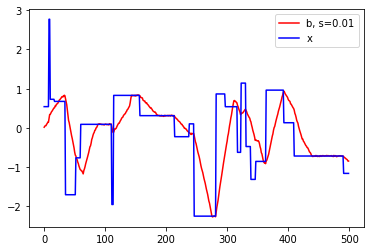

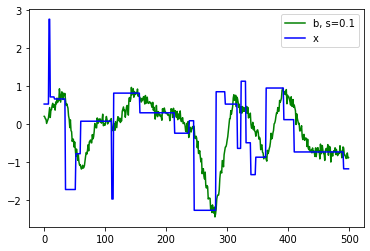

In [126]:
import csv
import matplotlib.pyplot as plt
# reading x
with open('xsignal.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
x = []
for e in data:
    x.append(float(e[0]))

# generation b
def genAb(k, s):
    n = len(x)
    A = genA(n, k)
    w = genw(s, n)
    Ax = A@x
    b = np.zeros(n)
    for i in range(len(Ax)):
        b[i] = Ax[i] + w[i]
    return A, b
A, b = genAb(30, 0.01)
plt.plot(b, c="r", label = "b, s=0.01")
plt.plot(x, c="b", label = "x")
plt.legend()
plt.show()
A, b = genAb(30, 0.1)
plt.plot(b, c="g", label = "b, s=0.1")
plt.plot(x, c="b", label = "x")
plt.legend()

## c)

## (i) Ordinary Least Square

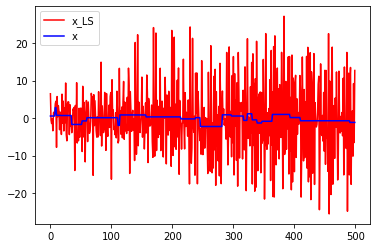

In [127]:
x_LS = np.linalg.inv(A.T @ A) @ A.T @ b
plt.plot(x_LS, c="r", label="x_LS")
plt.plot(x, c="b", label = "x")
plt.legend()

## (ii) Truncated SVD

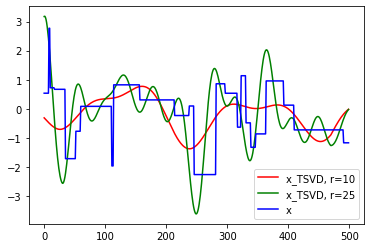

In [128]:
def trunk_SVD(X, y, r):
    U,s,VT = np.linalg.svd(X,full_matrices=False)
    UT = U.T
    V = VT.T
    a, b = X.shape
    X_inv = np.zeros((b, a))
    for i in range(r):
        X_inv += (1/s[i]) * V[:, [i]] @ UT[[i], :]
    w = X_inv @ y
    return w

x_SVD = trunk_SVD(A, x, 10)
plt.plot(x_SVD, c="r", label="x_TSVD, r=10")
x_SVD = trunk_SVD(A, x, 25)
plt.plot(x_SVD, c="g", label="x_TSVD, r=25")
plt.plot(x, c="b", label = "x")
plt.legend()

## (iii) Regularzied Least Square

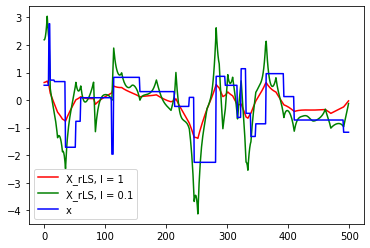

In [129]:
def ridge_regres(X, y, l):
    U,s,VT = np.linalg.svd(X,full_matrices=False)
    I = np.identity(len(X[0]))
    S_sq = np.diag(np.square(s))
    w = VT.T @ np.linalg.inv(S_sq + l * I) @ np.diag(s) @ U.T @ y
    return w

x_rLS = ridge_regres(A, x, 1)
plt.plot(x_rLS, c="r", label="X_rLS, l = 1")
x_rLS = ridge_regres(A, x, 0.1)
plt.plot(x_rLS, c="g", label="X_rLS, l = 0.1")
plt.plot(x, c="b", label = "x")
plt.legend()

## d)

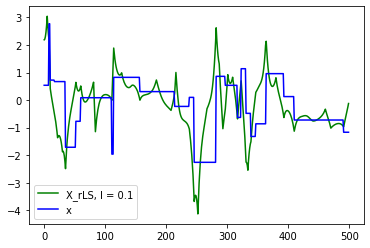

In [164]:
# Take sigma = 0.1 and k = 30
A, b = genAb(30, 0.1)
x_rLS = ridge_regres(A, x, 0.1)
plt.plot(x_rLS, c="g", label="X_rLS, l = 0.1")
plt.plot(x, c="b", label = "x")
plt.legend()
plt.show()

As reference, when sigma = 0.1 and k = 30, the best r for ridge regression is around 0.2

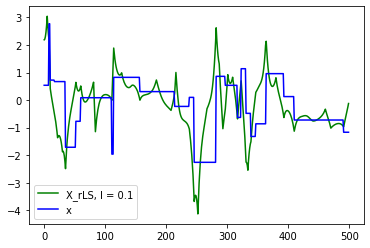

In [169]:
# Take sigma = 1 and k = 30
A, b = genAb(30, 1)
x_rLS = ridge_regres(A, x, 0.1)
plt.plot(x_rLS, c="g", label="X_rLS, l = 0.1")
plt.plot(x, c="b", label = "x")
plt.legend()
plt.show()

Using a different sigma, say 0.1, does not affect that best choice for r

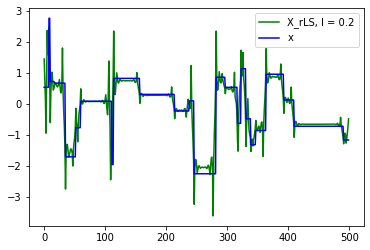

In [166]:
# Take sigma = 0.1 and k = 5
A, b = genAb(5, .1)
x_rLS = ridge_regres(A, x, 0.1)
plt.plot(x_rLS, c="g", label="X_rLS, l = 0.2")
plt.plot(x, c="b", label = "x")
plt.legend()
plt.show()

Here, with k decraesed to 5, the same r for ridge regression is able to generate an estimate with much better fit. However, the same r still remains the rest choice for ridge regression.